## Indian Cuisine Analysis

### “Indian cuisine uses the whole palette of flavors—spicy, sour, sweet, and hot all at the same time—making it something that wants to jump off the plate,”

The cuisine of India is one of the world's most diverse cuisines, characterized by its sophisticated and subtle use of the many spices, vegetables, grains and fruits grown across India.The cuisine of India has is considered one of the world’s most diverse cuisines. This analysis comprises of some interesting facts and observations that people might not know about Indian cuisine.

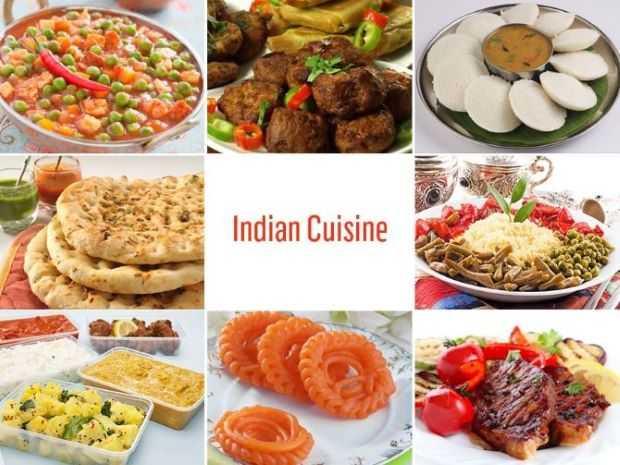

In [167]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from descartes.patch import PolygonPatch
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud


In [169]:
df = pd.read_csv('indian_food.csv')
df=df.replace(-1,np.nan)
df=df.replace('-1',np.nan)
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.0,30.0,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.0,60.0,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,NaN,NaN,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central


In [156]:
df.shape

(255, 9)

This dataset contains 255 indian dishes and 9 columns associated with each of them.

### I. Proportion of vegetarian and non vegetarian dishes

In [157]:
df_pie = df.diet.value_counts().reset_index()
df_pie.columns=['diet','count']
fig=px.pie(df_pie,values='count',names='diet',title='Proportion of Vegetarian and Non-Vegetarian dishes',
           color_discrete_sequence=['green','red'])
fig.show()


<div class="alert-alert-block alert-warning">

**Observation:-**
</div>
    Here we observed that no. of vegetarian dishes are <b>more</b> than the no. of non-vegetarian dishes.


<div class="alert-alert-block alert-warning">

**Facts:-** 
</div>
    India is ranked top in the world with <u>38%</u> of the total population being vegetarians.
    

### II. Number of dishes based on regions 

In [158]:
df_region = df.region.value_counts().reset_index()
df_region.columns=['region','count']
df_region=df_region.sample(frac=1)
fig=px.bar(df_region,x='region',y='count',title='Number of dishes based on religion',color_discrete_sequence=['#1A237E'])
fig.show()

<div class="alert-alert-block alert-warning">

**Observation:-**
</div>
    Here we observed that western dishes are highest in number.


### III. State-wise Distribution of Indian Sweets

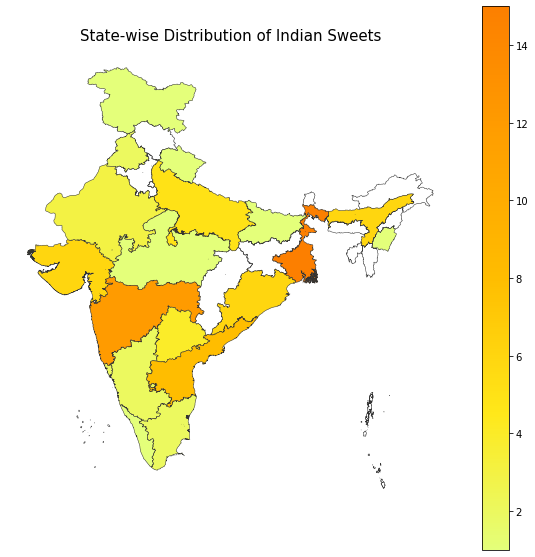

In [159]:
shp_gdf = gpd.read_file('Indian States/Indian_states.shp')
desserts = df[df['course']=='dessert']
des_df = desserts.state.value_counts().reset_index()
des_df.columns=['state','count']
des_df.head()
merged = shp_gdf.set_index('st_nm').join(des_df.set_index('state'))
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Distribution of Indian Sweets',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='count', cmap='Wistia', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

<div class="alert-alert-block alert-warning">

**Observation:-**
</div>
Most number of famous sweets are seen in <b>West Bengal</b>.


<div class="alert-alert-block alert-warning">

**Facts:-** 
</div>
   There are more than <b>hundred</b> varieties of indian sweets made in different sates in India .
    

### IV. Number of dishes based on courses of meal

In [160]:
course_df = df.course.value_counts().reset_index()
course_df.columns = ['course','count']
course_df.head()
course_df = course_df.sample(frac=1)
fig = px.bar(course_df,x='course',y='count',title='Number of dishes based on courses of meal',
             color_discrete_sequence=['#FA962F'])
fig.show()

<div class="alert-alert-block alert-warning">

**Observation:-**
</div>
About <b>129</b> dishes are preferrably eaten as <b>main course</b>.


<div class="alert-alert-block alert-warning">

**Facts:-** 
</div>
   The very famous sweet gulab jamun without it we cannot imagine any celebration is actually a <b>Mediterranean dish</b> that was 
   accidentally invented by Shah Jahan's Chef.Gulab Jamun is a Persian name,this dessert was first prepared in the
   Mediterranean region.
    

### V. Proportion of Flavour Profiles

In [161]:
pie_df = df.flavor_profile.value_counts().reset_index()
pie_df.columns = ['flavor','count']
fig=px.pie(pie_df, values='count', names='flavor', title='Proportion of Flavor Profiles',
             color_discrete_sequence=['#FF7F0E', '#00B5F7','#AB63FA','#00CC96'])
fig.show()

<div class="alert-alert-block alert-warning">

**Observation:-**
</div>
More tahn 50% indian dishes are <b>spicy</b> in flavour.


<div class="alert-alert-block alert-warning">

**Facts:-** 
</div>
 <b>Worls's Spic Bowl</b>India is the world's largest producer of spices.India produces <b>~75</b> of the 109 varieties of spices listed by ISO.
    

### VI. Ingredients used in Indian deserts

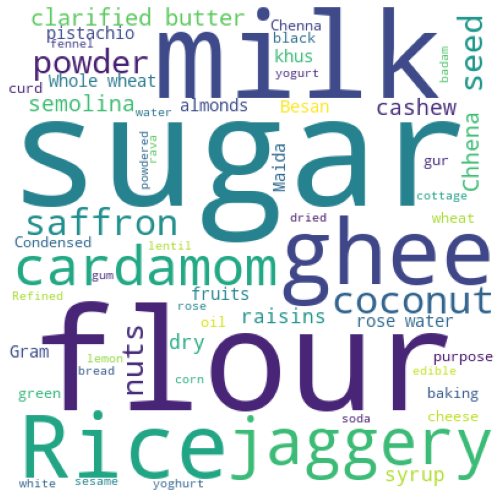

In [162]:
dessert_df  = df[df['course']=='dessert'].reset_index()

ingredients = []
for i in range(0,len(dessert_df)):
    text = dessert_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)  
plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

<div class="alert-alert-block alert-warning">

**Observation:-**
</div>
Most commonly used ingredients in indian desserts are <b>flour,sugar,milk,ghee,rice</b> in flavour.


### VII. Ingredients used in South Indian cuisines

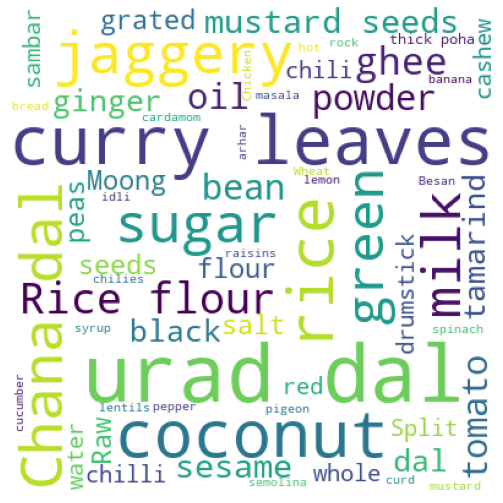

In [163]:
south_df = df[df['region']=='South'].reset_index()

ingredients = []
for i in range(0,len(south_df)):
    text = south_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
    
wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

<div class="alert-alert-block alert-warning">

**Observation:-**
</div>
Most commonly used ingredients in South-Indian cuisines are <b>urad dal,coconut,curry leaves,chana dal,rice</b> in flavour.


### VIII. List of Indian dishes that are sweet in flavour but not desserts

In [164]:
sweet_df = df[df['flavor_profile']=='sweet']
final_sweet_df = sweet_df[sweet_df['course']!='dessert']
#final_sweet_df

 - Obbattu holige
 - Dal makhani
 - Mishti Chholar Dal	